11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9158 - loss: 0.2742 - val_accuracy: 0.9856 - val_loss: 0.0423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9900 - val_loss: 0.0303
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9906 - val_loss: 0.0278
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9903 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9901 - val_loss: 0.0326
313/313 - 3s - 9ms/step - accuracy: 0.9901 - loss: 0.0326

✅ Test Accuracy: 99.01%


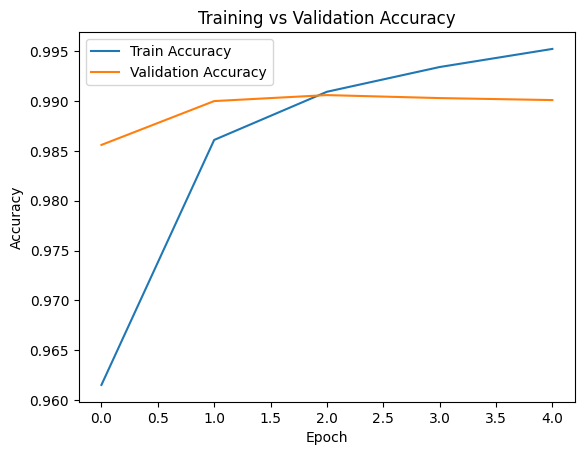

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


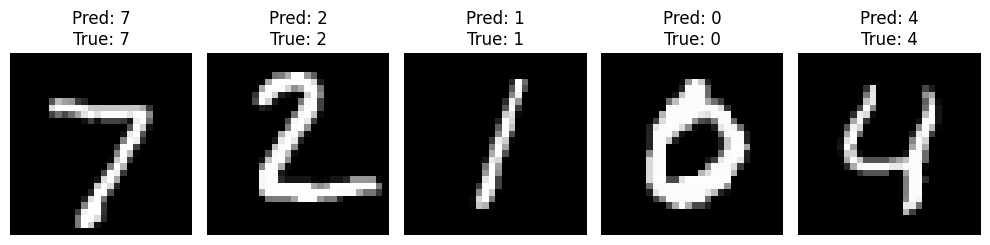

In [1]:
# ============================================
#  TASK 2: Deep Learning with TensorFlow
# Dataset: MNIST Handwritten Digits
# ============================================

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255) → (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

# Step 6: Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Step 7: Visualize Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Visualize 5 Sample Predictions
predictions = model.predict(x_test)
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
